Pairs of restaurants

In the last lesson, you cleaned the `restaurants` dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named `restaurants_new` with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the `cuisine_type` and `city` columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with `restaurants`.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between `restaurants` and `restaurants_new`. Both DataFrames, pandas and recordlinkage are in your environment.

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from thefuzz import fuzz
import recordlinkage

fake = Faker()
path=r'Z:/'
file='restaurants_L2.csv'
restaurants = pd.read_csv(path+file,index_col = [0]) #,parse_dates=['birth_date']
#acct_cur = [fake.random_element(elements=('dollar', 'euro')) for _ in range(len(banking))]
#banking['acct_cur']=acct_cur
restaurants = restaurants.rename(columns={'name':'rest_name','addr':'rest_addr','type':'cuisine_type'})
print(restaurants.head(),'\n')

                   rest_name                  rest_addr         city  \
0  arnie morton's of chicago   435 s. la cienega blv .   los angeles   
1         art's delicatessen       12224 ventura blvd.   studio city   
2                  campanile       624 s. la brea ave.   los angeles   
3                      fenix    8358 sunset blvd. west     hollywood   
4         grill on the alley           9560 dayton way   los angeles   

        phone cuisine_type  
0  3102461501     american  
1  8187621221     american  
2  2139381447     american  
3  2138486677     american  
4  3102760615     american   



In [2]:
file='restaurants_L2_dirty.csv'
restaurants_new = pd.read_csv(path+file,index_col = [0]) #,parse_dates=['birth_date']
#acct_cur = [fake.random_element(elements=('dollar', 'euro')) for _ in range(len(banking))]
#banking['acct_cur']=acct_cur
restaurants_new = restaurants_new.rename(columns={'name':'rest_name','addr':'rest_addr','type':'cuisine_type'})
print(restaurants_new.head(),'\n')

  rest_name                 rest_addr         city       phone  cuisine_type
0    kokomo         6333 w. third st.           la  2139330773      american
1    feenix   8358 sunset blvd. west     hollywood  2138486677      american
2   parkway      510 s. arroyo pkwy .     pasadena  8187951001   californian
3      r-23          923 e. third st.  los angeles  2136877178      japanese
4     gumbo         6333 w. third st.           la  2139330358  cajun/creole 



* Instantiate an indexing object by using the `Index()` function from `recordlinkage`.
* Block your pairing on `cuisine_type` by using `indexer`'s' `.block()` method.
* Generate pairs by indexing `restaurants` and `restaurants_new` in that order.


In [3]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

Question

Now that you've generated your pairs, you've achieved the first step of record linkage. What are the steps remaining to link both restaurants DataFrames, and in what order?

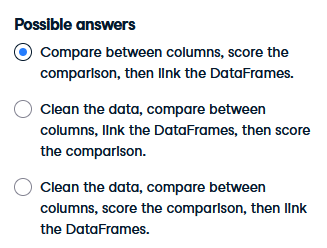
